In [ ]:
# Importation

import numpy as np
from numpy import random
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
# Définit l'affichage du résultat

def view_samples(samples, m, n):
    fig, axes = plt.subplots(figsize=(10, 10), nrows=m, ncols=n, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(1-img.reshape((2,2)), cmap='Greys_r')  
    return fig, axes

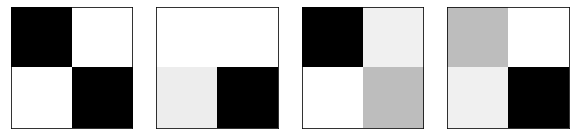

In [ ]:
# Exemples de visages

faces = [np.array([1,0,0,1]),
         np.array([0.1,0.1,0.2,0.8]),
         np.array([0.9,0.2,0.1,0.4]),
         np.array([0.4,0.1,0.2,0.9]),
         np.array([0.5,0.2,0.1,0.9])]
    
_ = view_samples(faces, 1, 4) # déf fenêtre sous forme matrice de matrice visages (1 4) 
                              # ayant pour échantillon "visages" ; ayant pour 1 ligne ; et 4 colonnes

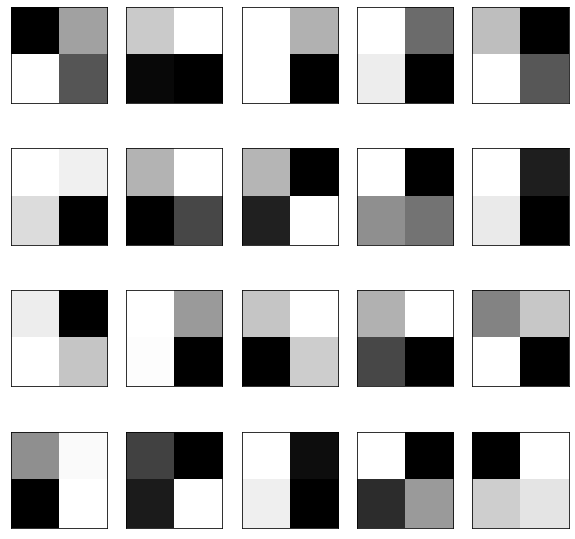

In [ ]:
# Exemples de bruits qu'on génère manuellement à l'aide de bib random

noise = [np.random.randn(2,2) for i in range(20)]
def generate_random_image():
    return [np.random.random(), np.random.random(), np.random.random(), np.random.random()]

_ = view_samples(noise, 4,5) # déf les bruits sous forme de matrice de matrice bruit (4 5) ; 4 lignes ; 5 colonnes

In [ ]:
# Déf fonction sigmoide
def sigmoid(x):
    return np.exp(x)/(1.0+np.exp(x))   

In [ ]:
class Discriminator():
    def __init__(self):
        #self.weights = np.array([0.0 for i in range(4)])
        #self.bias = 0.0
        self.weights = np.array([np.random.normal() for i in range(4)])
        self.bias = np.random.normal()
    
    def forward(self, x):
        # calcul du sigma du poids
        return sigmoid(np.dot(x, self.weights) + self.bias)
    
    def error_from_image(self, image):
        prediction = self.forward(image)
        # On veut que taux en sortie soit de 1, ayant pour valeur en erreur de -log(prediction)
        return -np.log(prediction)
    
    def derivatives_from_image(self, image):
        prediction = self.forward(image)
        derivatives_weights = -image * (1-prediction)
        derivative_bias = -(1-prediction)
        return derivatives_weights, derivative_bias
    
    def update_from_image(self, x):
        ders = self.derivatives_from_image(x)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

    def error_from_noise(self, noise):
        prediction = self.forward(noise)
        # We want the prediction to be 0, so the error is -log(1-prediction)
        return -np.log(1-prediction)
    
    def derivatives_from_noise(self, noise):
        prediction = self.forward(noise)
        derivatives_weights = noise * prediction
        derivative_bias = prediction
        return derivatives_weights, derivative_bias
    
    def update_from_noise(self, noise):
        ders = self.derivatives_from_noise(noise)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

In [ ]:
class Generator():
    def __init__(self):
        self.weights = np.array([np.random.normal() for i in range(4)])
        self.biases = np.array([np.random.normal() for i in range(4)])

    def forward(self, z):
        # calcul du sigma du poids
        return sigmoid(z * self.weights + self.biases)

    def error(self, z, discriminator):
        x = self.forward(z)
        # SOuhait d'une prédiction à 0, l'erreur est donné par -log(1-prediction)
        y = discriminator.forward(x)
        return -np.log(y)

    def derivatives(self, z, discriminator):
        discriminator_weights = discriminator.weights
        discriminator_bias = discriminator.bias
        x = self.forward(z)
        y = discriminator.forward(x)
        factor = -(1-y) * discriminator_weights * x *(1-x)
        derivatives_weights = factor * z
        derivative_bias = factor
        return derivatives_weights, derivative_bias

    def update(self, z, discriminator):
        error_before = self.error(z, discriminator)
        ders = self.derivatives(z, discriminator)
        self.weights -= learning_rate * ders[0]
        self.biases -= learning_rate * ders[1]
        error_after = self.error(z, discriminator)

In [ ]:
# Paramètre Génèrateur aléatoire 
np.random.seed(42)

# Itérations
learning_rate = 0.01
epochs = 1000

# COmposants du Gan
D = Discriminator()
G = Generator()

# Plot les erreurs
errors_discriminator = []
errors_generator = []

for epoch in range(epochs):
    
    for face in faces:
        
        # MAJ poids du discriminants par rapport au véritable image
        D.update_from_image(face)
    
        # CHoisi nombre aléatoire à générer pour la copie fake du visage
        z = random.rand()

        # Calcule le taux d'erreur du discriminant
        errors_discriminator.append(sum(D.error_from_image(face) + D.error_from_noise(z)))
        
        #Calcule le taux d'erreur du générateur
        errors_generator.append(G.error(z, D))
        
        # Construit un visage fake
        noise = G.forward(z)
        
        #  MAJ poids du discriminants par rapport à l'image fake
        D.update_from_noise(noise)
    
        # MAJ poids du générateur par rapport à l'image fake
        G.update(z, D)

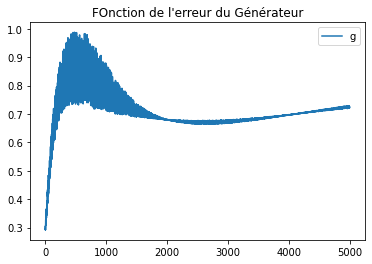

Text(0.5, 1.0, "Fonction de l'erreur du Discriminant")

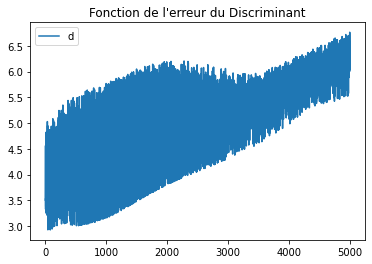

In [ ]:
import matplotlib.pyplot as plt
plt.plot(errors_generator)
plt.title("Fonction de l'erreur du Générateur")
plt.legend("gen")
plt.show()
plt.plot(errors_discriminator)
plt.legend('disc')
plt.title("Fonction de l'erreur du Discriminant")

[0.61528353 0.03599439 0.04143038 0.93749954]
[0.62580939 0.03556176 0.0454016  0.92967747]
[0.5963439  0.03677454 0.03518864 0.94941267]
[0.59686473 0.03675304 0.03534624 0.94911822]


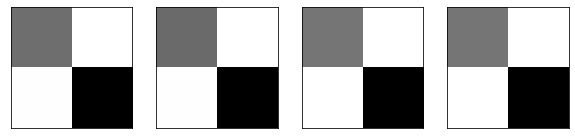

In [ ]:
generated_images = []
for i in range(4):
    z = random.random()
    generated_image = G.forward(z)
    generated_images.append(generated_image)
_ = view_samples(generated_images, 1, 4)
for i in generated_images:
    print(i)

In [ ]:
print("Poids du Generateur", G.weights)
print("Bias du Generateur", G.biases)

Poids du Generateur [-0.21169756  0.05938739 -0.45311763  0.59808416]
Bias du Generateur [ 0.58774005 -3.32088246 -2.88851055  2.37420895]


In [ ]:
print("Poids du Discriminant", D.weights)
print("Bias du Discriminant", D.bias)

Discriminator weights [ 0.0673787  -0.24755574 -0.39513878 -0.55526305]
Discriminator bias 0.4286770229021527
